In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "./drive/MyDrive/CurrencyProject/Data_COMP5212project.xlsx"

In [4]:
df_er = pd.read_excel (path, sheet_name='ER')
print (df_er)

          Date  USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
0   1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1   1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
2   1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
3   1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
4   1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030
..         ...      ...      ...      ...      ...      ...      ...      ...
261 2020-10-01   6.6927   104.64   1.1647   1.3317   0.7026   0.9167   1.2941
262 2020-11-01   6.5789   104.27   1.1928   1.3000   0.7345   0.9090   1.3321
263 2020-12-01   6.5250   103.24   1.2213   1.2730   0.7694   0.8851   1.3673
264 2021-01-01   6.4250   104.68   1.2136   1.2777   0.7642   0.8903   1.3702
265 2021-02-01   6.4730   106.58   1.2074   1.2739   0.7705   0.9082   1.3932

[266 rows x 8 columns]


In [5]:
df_er['ER_datetime']=pd.to_datetime(df_er['Date'], format='%Y%m%d', errors='raise')

In [6]:
df_er.head()

,Date,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
0,1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01
1,1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
2,1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
3,1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
4,1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01


In [7]:
df_er=df_er.drop(columns='Date')

In [8]:
df_var = pd.read_excel (path, sheet_name='Variables')
df_var['DLTINT_USEA'] = df_var['LTINT_USA'] - df_var['LTINT_EA19']

In [9]:
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351


In [10]:
df_var['Var_datetime']=pd.to_datetime(df_var['Date'], format='%Y%m%d', errors='raise')
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Var_datetime
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1999-01-01
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1999-02-01
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1999-03-01
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1999-04-01
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1999-05-01


In [11]:
df_var=df_var.drop(columns='Date')

In [12]:
df_var["Current_EUR_USD"] = df_er["EUR_USD"].copy()
df_var = df_var[:-1]
df_er = df_er[1:].reset_index(drop=True)
df_all = df_var.copy()
df_all[df_er.columns] = df_er

In [13]:
#df_all=df_er.set_index('datetime',drop=False).join(df_var.set_index('datetime')) 

In [14]:
df_all.head()

,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Var_datetime,Current_EUR_USD,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
0,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1999-01-01,1.1366,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
1,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1999-02-01,1.1025,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
2,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1999-03-01,1.0770,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
3,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1999-04-01,1.0570,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01
4,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1999-05-01,1.0423,8.2787,121.04,1.0357,1.4623,0.6683,1.5480,1.5775,1999-06-01


In [15]:
df_all.to_csv("df_all.csv",index=False) ##Export the data for future use

In [16]:
#to use the columns related to USD and EU
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19', 'DLTINT_USEA', 'Current_EUR_USD']]

In [17]:
df_usdeu.head()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
0,1.1025,1279.64,NaN,286.3,11.35,69.31992,NaN,4.89,3.1321,4.72,3.8220,0.8980,1.1366
1,1.0770,1238.33,NaN,287.5,10.88,69.40430,NaN,4.90,3.0934,5.00,3.9742,1.0258,1.1025
2,1.0570,1286.37,NaN,279.8,15.24,69.61526,NaN,4.91,3.0467,5.23,4.1810,1.0490,1.0770
3,1.0423,1335.18,NaN,286.8,16.57,70.12155,NaN,4.88,2.6965,5.18,4.0407,1.1393,1.0570
4,1.0357,1301.84,NaN,270.4,15.20,70.12155,NaN,4.92,2.5790,5.54,4.2049,1.3351,1.0423


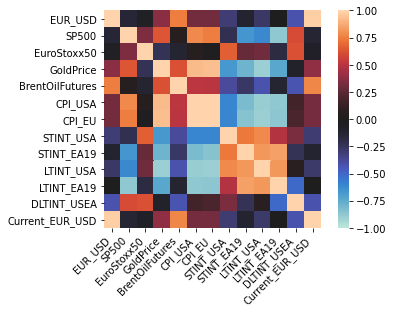

In [18]:
#correlation heat map

corr_usdeu = df_usdeu.corr()
ax = sns.heatmap(
    corr_usdeu, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [19]:
#random forest regressor https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
#usdeu_x=np.c_[df_usdeu['SP500'], df_usdeu['EuroStoxx50'],df_usdeu['GoldPrice'],df_usdeu['BrentOilFutures'],df_usdeu['CPI_USA'],df_usdeu['CPI_EU'],df_usdeu['STINT_USA'],df_usdeu['STINT_EA19'],df_usdeu['LTINT_USA'],df_usdeu['LTINT_EA19'],df_usdeu['DLTINT_USEA']]

usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
usdeu_x_train.head(5)

,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
117,968.75,2591.76,716.8,65.32,91.37446,91.35,4.32,5.1131,3.81,4.4158,-0.6058,1.2733
80,1228.81,3428.51,469.0,63.48,83.87584,84.06,3.87,2.1391,4.20,3.1555,1.0445,1.2030
86,1294.83,3853.74,581.8,65.91,84.29775,84.79,4.88,2.7226,4.72,3.7312,0.9888,1.2119
116,1166.36,3038.20,874.2,98.17,92.30688,91.28,3.59,5.0192,3.69,4.5043,-0.8143,1.4104
112,1400.38,3777.85,887.3,127.78,91.39935,90.96,2.66,4.8574,3.88,4.4233,-0.5433,1.5554


In [21]:
usdeu_x_test.head(5)

,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
68,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432
136,1089.41,2610.26,1212.2,74.65,92.05163,93.18,0.45,0.6865,3.42,3.6821,-0.2621,1.2306
89,1270.20,3648.92,613.5,73.51,85.60567,85.67,5.35,2.9857,5.11,4.0751,1.0349,1.2789
61,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490
243,2945.83,3514.62,1340.4,72.80,107.81840,105.26,2.47,-0.3105,2.53,0.9510,1.5790,1.1217


In [22]:
usdeu_y_train.head(5)

117    1.2698
80     1.1988
86     1.2637
116    1.2733
112    1.5756
Name: EUR_USD, dtype: float64

In [23]:
usdeu_y_test.head(5)

68     1.2785
136    1.2236
89     1.2763
61     1.2315
243    1.1169
Name: EUR_USD, dtype: float64

Mean Absolute Error: 0.03 degrees.
MAE: 0.02619066020408164
MSE: 0.0012219809159460433
RMSE: 0.03495684362104284
R-squared:  0.9154777707271272
Accuracy: 97.94 %.


Text(0, 0.5, 'Predictions')

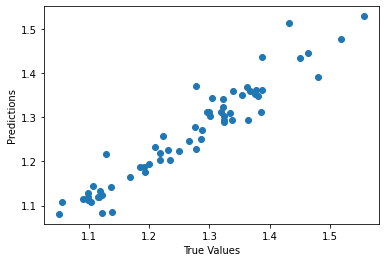

In [24]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

regressor.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = regressor.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### XGBoost

In [25]:
import xgboost as xgb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[03:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.03 degrees.
MAE: 0.028913260175311376
MSE: 0.0015010807297075668
RMSE: 0.03874378311042388
R-squared:  0.8898070072484944
Accuracy: 97.68 %.


Text(0, 0.5, 'Predictions')

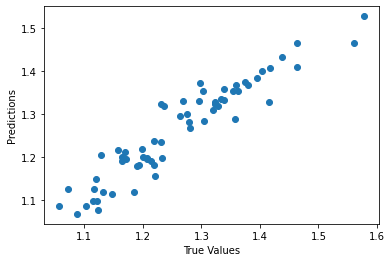

In [26]:
#random forest regressor https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
#usdeu_x=np.c_[df_usdeu['SP500'], df_usdeu['EuroStoxx50'],df_usdeu['GoldPrice'],df_usdeu['BrentOilFutures'],df_usdeu['CPI_USA'],df_usdeu['CPI_EU'],df_usdeu['STINT_USA'],df_usdeu['STINT_EA19'],df_usdeu['LTINT_USA'],df_usdeu['LTINT_EA19'],df_usdeu['DLTINT_USEA']]

usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3)

xgb_reg = xgb.XGBRegressor(n_estimators=1000, max_depth=3)

xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### XGBoost after Tuning HyperParameter

[03:27:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.02 degrees.
MAE: 0.019958162059481192
MSE: 0.0008069994935147446
RMSE: 0.028407736508119483
R-squared:  0.9507903376670273
Accuracy: 98.44 %.


Text(0, 0.5, 'Predictions')

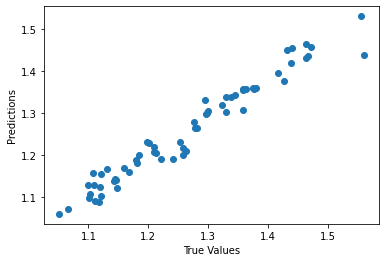

In [27]:
usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=15)

xgb_reg = xgb.XGBRegressor(n_estimators=2000, 
                               max_depth=3,
                               learning_rate=0.1,
                               reg_alpha=0.3,
                               reg_lambda=0.3,
                               subsample=0.6,
                               random_state=38)

xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_test)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### Tuning HyperParameter

In [28]:
# import random
# import time
# start=time.time()
# require_time = 600
# acc_list = []
# param_list = []
# while True:
#     param = [random.randint(2,10),
#              random.choice([1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]),
#              random.choice(['gbtree']),
#              random.randint(1,10)/10.0,
#              random.randint(1,10)/10.0,
#              random.randint(5,10)/10.0,
#              random.randint(1,100),
#              random.choice([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]),
#              random.randint(1,100)]
        
#     xgb_reg = xgb.XGBRegressor(n_estimators=param[7], 
#                                max_depth=param[0],
#                                learning_rate=param[1],
#                                booster=param[2],
#                                reg_alpha=param[3],
#                                reg_lambda=param[4],
#                                subsample=param[5],
#                                random_state=param[6])
#     usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=param[8])
#     xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

#     # Use the forest's predict method on the test data
#     predictions = xgb_reg.predict(usdeu_x_test)
#     # Calculate the absolute errors
#     errors = abs(predictions - usdeu_y_test)
#     # Print out the mean absolute error (mae)


#     # Calculate mean absolute percentage error (MAPE)
#     mape = 100 * (errors / usdeu_y_test)
#     # Calculate and display accuracy
#     accuracy = 100 - np.mean(mape)
#     acc_list.append(accuracy)
#     param_list.append(param)
#     if accuracy>98.:
#         print('Accuracy:', round(accuracy, 2), '%.', param)
    
#     used_time = time.time() - start
#     if used_time>require_time:
#         break
# max_acc = max(acc_list)

# print('Accuracy:', max_acc, '%.', param_list[acc_list.index(max_acc)])

In [29]:
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()

# lin_reg.fit(usdeu_x_train, usdeu_y_train) 

# # Use the forest's predict method on the test data
# predictions = lin_reg.predict(usdeu_x_test)
# # Calculate the absolute errors
# errors = abs(predictions - usdeu_y_test)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions))
# print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions)))
# print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions)) 

# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / usdeu_y_test)
# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# plt.scatter(usdeu_y_test, predictions)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")

### Deep Learning - LSTM

In [30]:
df_usdeu.pop("EUR_USD")
df_usdeu

,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
56,995.97,2395.87,385.4,27.61,78.13786,79.88,1.08,2.1473,4.27,4.2319,0.0381,1.1660
57,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584
58,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994
59,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588
60,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469
...,...,...,...,...,...,...,...,...,...,...,...,...
260,3363.00,3193.61,1907.8,40.95,109.81490,105.73,0.13,-0.4914,0.68,0.1230,0.5570,1.1718
261,3269.96,2958.21,1892.4,37.46,109.86050,105.92,0.12,-0.5091,0.79,0.0005,0.7895,1.1647
262,3621.63,3492.54,1784.8,47.59,109.79340,105.63,0.16,-0.5209,0.87,-0.0553,0.9253,1.1928
263,3756.07,3552.64,1899.6,51.80,109.89680,105.97,0.17,-0.5381,0.93,-0.0915,1.0215,1.2213


In [31]:
usdeu_12m = pd.DataFrame()
for i in range(12):
  usdeu_12m[list(map(lambda x: "{}th".format(i+1)+x, df_usdeu.columns))] = df_usdeu[i:-11+i if -11+i <0 else None].reset_index(drop=True).copy()

In [32]:
usdeu12m_x = usdeu_12m
usdeu12m_x

,1thSP500,1thEuroStoxx50,1thGoldPrice,1thBrentOilFutures,1thCPI_USA,1thCPI_EU,1thSTINT_USA,1thSTINT_EA19,1thLTINT_USA,1thLTINT_EA19,1thDLTINT_USEA,1thCurrent_EUR_USD,2thSP500,2thEuroStoxx50,2thGoldPrice,2thBrentOilFutures,2thCPI_USA,2thCPI_EU,2thSTINT_USA,2thSTINT_EA19,2thLTINT_USA,2thLTINT_EA19,2thDLTINT_USEA,2thCurrent_EUR_USD,3thSP500,3thEuroStoxx50,3thGoldPrice,3thBrentOilFutures,3thCPI_USA,3thCPI_EU,3thSTINT_USA,3thSTINT_EA19,3thLTINT_USA,3thLTINT_EA19,3thDLTINT_USEA,3thCurrent_EUR_USD,4thSP500,4thEuroStoxx50,4thGoldPrice,4thBrentOilFutures,...,9thLTINT_USA,9thLTINT_EA19,9thDLTINT_USEA,9thCurrent_EUR_USD,10thSP500,10thEuroStoxx50,10thGoldPrice,10thBrentOilFutures,10thCPI_USA,10thCPI_EU,10thSTINT_USA,10thSTINT_EA19,10thLTINT_USA,10thLTINT_EA19,10thDLTINT_USEA,10thCurrent_EUR_USD,11thSP500,11thEuroStoxx50,11thGoldPrice,11thBrentOilFutures,11thCPI_USA,11thCPI_EU,11thSTINT_USA,11thSTINT_EA19,11thLTINT_USA,11thLTINT_EA19,11thDLTINT_USEA,11thCurrent_EUR_USD,12thSP500,12thEuroStoxx50,12thGoldPrice,12thBrentOilFutures,12thCPI_USA,12thCPI_EU,12thSTINT_USA,12thSTINT_EA19,12thLTINT_USA,12thLTINT_EA19,12thDLTINT_USEA,12thCurrent_EUR_USD
0,995.97,2395.87,385.4,27.61,78.13786,79.88,1.08,2.1473,4.27,4.2319,0.0381,1.1660,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,...,4.72,4.3862,0.3338,1.2186,1140.84,2811.08,392.6,34.50,80.03645,81.75,1.46,2.1127,4.73,4.4426,0.2874,1.2187,1101.72,2720.05,391.0,40.03,79.90988,81.62,1.57,2.1160,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188
1,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,...,4.73,4.4426,0.2874,1.2187,1101.72,2720.05,391.0,40.03,79.90988,81.62,1.57,2.1160,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432
2,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,...,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785
3,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490,1126.21,2787.49,427.3,31.51,...,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785,1173.82,2876.39,451.3,45.51,80.58494,82.15,2.26,2.1703,4.19,3.8687,0.3213,1.3293
4,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490,1126.21,2787.49,427.3,31.51,79.06606,80.98,1.05,2.0288,3.83,4.0194,-0.1894,1.2315,1107.30,2787.48,387.0,34.48,...,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785,1173.82,2876.39,451.3,45.51,80.58494,82.15,2.26,2.1703,4.19,3.8687,0.3213,1.3293,1211.92,2951.01,437.5,40.46,80.28960,82.43,2.45,2.1732,4.23,3.6893,0.5407,1.3558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [33]:
usdeu12m_y = usdeu_y[11:]

In [34]:
import torch
from torch.nn import functional as F
import random
torch.use_deterministic_algorithms(True) ## For Reproducibility

In [35]:
class MPELoss(torch.nn.Module):
    def __init__(self, power):
        super().__init__()
        self.power = power
    
    def forward(self, pred, ytrue):
        l = torch.sum(torch.abs(torch.pow(pred,self.power) - torch.pow(ytrue,self.power))/ytrue.view(-1).shape[0])
        return l

class LSTM_model(torch.nn.Module):
    def __init__(self, input_size=12, hidden_size=12, num_layers=3, middle_feature=20, seed=None):
        super().__init__()
        if seed != None:
            torch.manual_seed(seed)
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, )
        self.linear = torch.nn.Linear(in_features=12*hidden_size, out_features=middle_feature)
        self.outlayer = torch.nn.Linear(in_features=middle_feature, out_features=1)
        self.normlayer = torch.nn.InstanceNorm1d(12)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []
    
    def forward(self, x):
        x, (hn, cn) = self.lstm(x)
        x = self.normlayer(x)
        x = F.relu(x)
        x = x.reshape(x.shape[0], -1)
        x = self.linear(x)
        x = F.relu(x)
        x = self.outlayer(x)
        return x

    def fit(self, x, y, epochs, lr=0.001):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 12, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 12, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1,12,12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        
        lossfn = torch.nn.L1Loss().to(self.device)
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        i = 0
        
        for i in range(epochs):
            optimizer.zero_grad()
            pred = self.forward(x)
            l = lossfn(pred, y)
            l.backward()
            optimizer.step()
            
            if i % 200 == 0:
                print("loss: ", l.item())
            if i > 1000 and l.item() > 5:
                break

            self.loss_hist.append(l)
            self.state_dict_hist.append(self.state_dict())
            
    
    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return 
    
    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 12, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 12, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1,12,12).float().to(self.device)
        
        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

loss:  1.2826910018920898
loss:  0.0125085124745965
loss:  0.009856716729700565
loss:  0.01760029047727585
loss:  0.0067823841236531734
loss:  0.01747937686741352
loss:  0.01127668283879757
loss:  0.010782781057059765
loss:  0.011085383594036102
loss:  0.012768005020916462
Accuracy: 98.22 %.


Text(0, 0.5, 'Predictions')

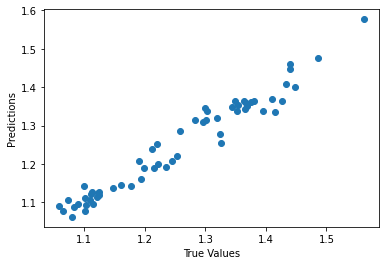

In [36]:
usdeu12m_x_train, usdeu12m_x_test, usdeu12m_y_train, usdeu12m_y_test = train_test_split(usdeu12m_x, usdeu12m_y, test_size = 0.3, random_state=68)
lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=150, seed=12)
lstm_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, epochs=2000, lr=0.0001)
lstm_model.load_best_state_dict()
predictions = lstm_model.predict(usdeu12m_x_test)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_test)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
# print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
# print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### Tuning HyperParameter

In [37]:
# accuracy = 0
# while accuracy < 98.1:
#   random_state = random.randint(0,100)
#   torch_seed = random.randint(0,100)
#   hid_size = random.choice([50, 100, 150, 200, 250,])
#   layers = random.choice([2, 3, 4, 5, 6])
#   mid_feature = random.choice([50, 100, 150, 200, 250,])
#   usdeu12m_x_train, usdeu12m_x_test, usdeu12m_y_train, usdeu12m_y_test = train_test_split(usdeu12m_x, usdeu12m_y, test_size = 0.3, random_state=random_state)
#   lstm_model = LSTM_model(hidden_size=hid_size,  num_layers=layers, middle_feature=mid_feature, seed=torch_seed)
#   lstm_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, epochs=2000, lr=0.0001)
#   lstm_model.load_best_state_dict()
#   predictions = lstm_model.predict(usdeu12m_x_test)
#   # Use the forest's predict method on the test data
#   # Calculate the absolute errors
#   errors = abs(predictions - usdeu12m_y_test)
#   # Print out the mean absolute error (mae)
#   # print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#   # print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
#   # print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
#   # print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
#   # print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions)) 

#   # Calculate mean absolute percentage error (MAPE)
#   mape = 100 * (errors / usdeu12m_y_test)
#   # Calculate and display accuracy
#   accuracy = 100 - np.mean(mape)
#   print('Accuracy:', round(accuracy, 2), '%.')
#   print([random_state, torch_seed, hid_size, layers, mid_feature])
# plt.scatter(usdeu12m_y_test, predictions)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")

### Deep Learning - TCNN

In [43]:
usdeu12m_x = usdeu_12m[["{}th".format(i+1) + "Current_EUR_USD" for i in range(12)]]

In [39]:
usdeu12m_x

,1thCurrent_EUR_USD,2thCurrent_EUR_USD,3thCurrent_EUR_USD,4thCurrent_EUR_USD,5thCurrent_EUR_USD,6thCurrent_EUR_USD,7thCurrent_EUR_USD,8thCurrent_EUR_USD,9thCurrent_EUR_USD,10thCurrent_EUR_USD,11thCurrent_EUR_USD,12thCurrent_EUR_USD
0,1.1660,1.1584,1.1994,1.2588,1.2469,1.2490,1.2315,1.1982,1.2186,1.2187,1.2020,1.2188
1,1.1584,1.1994,1.2588,1.2469,1.2490,1.2315,1.1982,1.2186,1.2187,1.2020,1.2188,1.2432
2,1.1994,1.2588,1.2469,1.2490,1.2315,1.1982,1.2186,1.2187,1.2020,1.2188,1.2432,1.2785
3,1.2588,1.2469,1.2490,1.2315,1.1982,1.2186,1.2187,1.2020,1.2188,1.2432,1.2785,1.3293
4,1.2469,1.2490,1.2315,1.1982,1.2186,1.2187,1.2020,1.2188,1.2432,1.2785,1.3293,1.3558
...,...,...,...,...,...,...,...,...,...,...,...,...
193,1.1152,1.1017,1.1212,1.1094,1.1027,1.1031,1.0957,1.1099,1.1231,1.1774,1.1936,1.1718
194,1.1017,1.1212,1.1094,1.1027,1.1031,1.0957,1.1099,1.1231,1.1774,1.1936,1.1718,1.1647
195,1.1212,1.1094,1.1027,1.1031,1.0957,1.1099,1.1231,1.1774,1.1936,1.1718,1.1647,1.1928
196,1.1094,1.1027,1.1031,1.0957,1.1099,1.1231,1.1774,1.1936,1.1718,1.1647,1.1928,1.2213


In [40]:
usdeu12m_y

67     1.2432
68     1.2785
69     1.3293
70     1.3558
71     1.3034
        ...  
260    1.1647
261    1.1928
262    1.2213
263    1.2136
264    1.2074
Name: EUR_USD, Length: 198, dtype: float64

In [41]:
class TCNN(torch.nn.Module):
    def __init__(self, seed=None):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        if seed != None:
          torch.manual_seed(seed)
        self.pad_2 = torch.nn.ConstantPad1d((0,2),0)
        self.pad_4 = torch.nn.ConstantPad1d((0,4),0)
        self.pad_8 = torch.nn.ConstantPad1d((0,8),0)
        self.pad_16 = torch.nn.ConstantPad1d((0,16),0)
        self.conv1d_d1 = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=1, )
        self.conv1d_d2 = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=2, )
        self.conv1d_d4 = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=4, )
        self.conv1d_d8 = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=8, )
        self.linear = torch.nn.Linear(12, 1)
        self.norm = torch.nn.BatchNorm1d(1)
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []

    def forward(self, x):
        x = self.pad_2(x)
        x = self.conv1d_d1(x)
        x = F.relu(self.norm(x))
        x = self.pad_4(x)
        x = self.conv1d_d2(x)
        x = F.relu(self.norm(x))
        x = self.pad_8(x)
        x = self.conv1d_d4(x)
        x = F.relu(self.norm(x))
        x = self.pad_16(x)
        x = self.conv1d_d8(x)
        x = F.relu(self.norm(x))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.linear(x))
        return x

    def fit(self, x, y, epochs, lr=0.001):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        
        lossfn = torch.nn.MSELoss().to(self.device)
        optimizer = torch.optim.RMSprop(self.parameters(), lr=lr)
        i = 0
        for i in range(epochs):
            optimizer.zero_grad()
            pred = self.forward(x)
            l = lossfn(pred, y)
            l.backward()
            optimizer.step()          
            if i % 200 == 0:
                print("loss: ", l.item())
            if i > 1000 and l.item() > 1:
                break
            self.loss_hist.append(l)
            self.state_dict_hist.append(self.state_dict())
      
    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        
        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return 

loss:  1.514076590538025
loss:  0.004942618310451508
loss:  0.002068886999040842
loss:  0.0019010176183655858
loss:  0.0017811590805649757
loss:  0.0017208385979756713
loss:  0.0016262680292129517
loss:  0.001578357070684433
loss:  0.0015504062175750732
loss:  0.001531910034827888
Accuracy: 98.2 %.


Text(0, 0.5, 'Predictions')

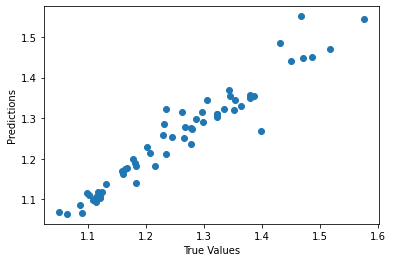

In [42]:
usdeu12m_x_train, usdeu12m_x_test, usdeu12m_y_train, usdeu12m_y_test = train_test_split(usdeu12m_x, usdeu12m_y, test_size = 0.3, random_state=12)
TCNN_model = TCNN(seed=23)
TCNN_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, epochs=2000, lr=0.001)
#TCNN_model.load_best_state_dict()
predictions = TCNN_model.predict(usdeu12m_x_test)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_test)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
# print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
# print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")